In [1]:
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [13]:
import numpy as np

In [19]:
from sklearn.datasets import load_sample_image

# Convolution Layer

In [15]:
china = load_sample_image('china.jpg')

In [7]:
flower = load_sample_image('flower.jpg')

In [9]:
image = china[150:220, 130:250]

In [10]:
height, width, channels = image.shape

In [14]:
image_grayscale = image.mean(axis=2).astype(np.float32)

In [18]:
images = image_grayscale.reshape(1, height, width, 1)

In [22]:
filter_map = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)

In [26]:
filter_map[:, 3, 0, 0] = 1

In [28]:
filter_map[3, :, 0, 1] = 1

In [31]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

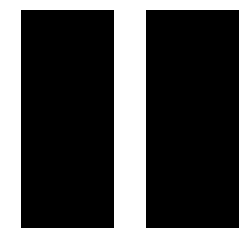

In [33]:
plot_image(filter_map[:, :, 0, 0])

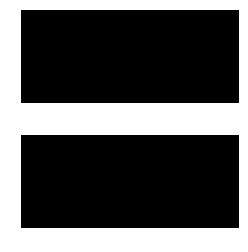

In [34]:
plot_image(filter_map[:, :, 0, 1])

In [35]:
tf.reset_default_graph()

In [36]:
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))

In [40]:
feature_maps = tf.constant(filter_map)

In [41]:
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [42]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

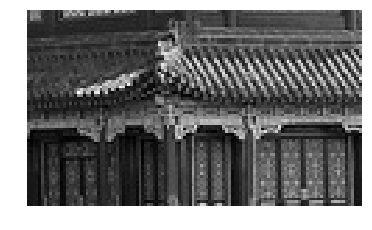

In [43]:
plot_image(images[0, :, :, 0])

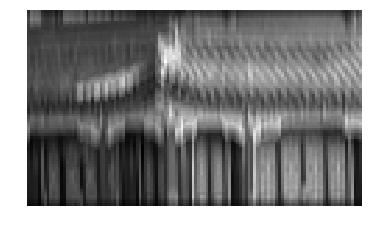

In [44]:
plot_image(output[0, :, :, 0])

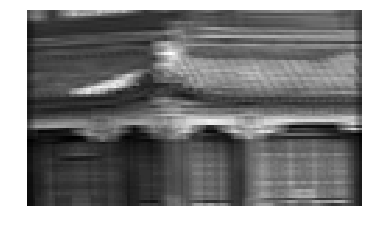

In [45]:
plot_image(output[0, :, :, 1])

In [46]:
dataset = np.array([china, flower], dtype=np.float32)

In [47]:
batch_size, height, width, channels = dataset.shape

In [48]:
tf.reset_default_graph()

In [49]:
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)

In [50]:
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],
                        padding="SAME")

In [52]:
init = tf.global_variables_initializer()

In [53]:
with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

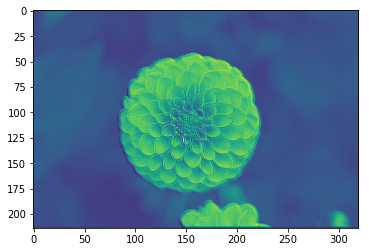

In [57]:
plt.imshow(output[1, :, :, 0])

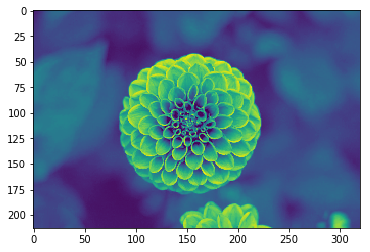

In [63]:
plt.imshow(output[1, :, :, 1])

## Maxpool

In [59]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))

In [60]:
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")

In [61]:
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

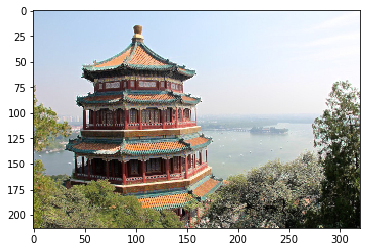

In [65]:
plt.imshow(output[0].astype(np.uint8))

# MNIST

In [73]:
tf.reset_default_graph()

In [74]:
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, 28*28], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, 28, 28, 1])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

In [75]:
conv1 = tf.layers.conv2d(X_reshaped, filters=32, kernel_size=3,
                         strides=1, padding="SAME",
                         activation=tf.nn.relu, name="conv1")

In [76]:
conv2 = tf.layers.conv2d(X_reshaped, filters=64, kernel_size=3,
                         strides=2, padding="SAME",
                         activation=tf.nn.relu, name="conv2")

In [77]:
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, 64 * 7 * 7])

In [78]:
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, 64, activation=tf.nn.relu, name="fc1")

In [79]:
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, 10, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

In [80]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [81]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [82]:
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [83]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [84]:
n_epochs = 10
batch_size = 100

In [85]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.97 Test accuracy: 0.9642
1 Train accuracy: 0.98 Test accuracy: 0.9728
2 Train accuracy: 0.97 Test accuracy: 0.9763
3 Train accuracy: 0.99 Test accuracy: 0.9788
4 Train accuracy: 0.99 Test accuracy: 0.98
5 Train accuracy: 1.0 Test accuracy: 0.9786
6 Train accuracy: 0.98 Test accuracy: 0.9824
7 Train accuracy: 0.99 Test accuracy: 0.9831
8 Train accuracy: 0.99 Test accuracy: 0.9794
9 Train accuracy: 0.98 Test accuracy: 0.9857
